# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# List to hold responses (storing name, lat dups for simplicity of moving into dictionary)
city_num = []
city_name = []
lat = []
lng = []
temp = []
humidity = []
clouds = []
wind_speed = []

# Loop through cities list to perform a request for info on each
for city in cities:
    
    # Create query, make request, and store in json
    weather_response = requests.get(query_url + city).json()
    
    # Grab data where available
    try:
        city_num.append(weather_response['id'])
        city_name.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        temp.append(weather_response['main']['temp'])
        humidity.append(weather_response['main']['humidity'])
        clouds.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
    
    # If any fields are blank, do not append to lists
    except:
        pass
    
    # Add interval between queries to stay within API query limits
    time.sleep(1)

# Print log
print(f"The weather API responded with: {city_num},{city_name}.")

The weather API responded with: [5282297, 3833367, 5882953, 5848280, 4032243, 1714733, 5122534, 2206939, 2146219, 3545841, 5905393, 2121385, 6538124, 1282256, 2163355, 5640350, 2636790, 2022572, 6201424, 1106677, 3652764, 3932145, 1244926, 3424607, 2013279, 5546220, 6113406, 964420, 4030556, 1524606, 2654970, 2729907, 2084442, 504042, 3173615, 3945985, 2074865, 3985710, 3831208, 3576994, 1629380, 3832899, 986717, 2136825, 546105, 1625929, 1735106, 3175096, 935215, 3981391, 2524245, 5880054, 3733380, 3137469, 3466980, 2110227, 1502073, 3899695, 467753, 5106841, 2174444, 448149, 3466704, 2264557, 3355672, 2075265, 2409215, 3372783, 3897347, 2027042, 2167426, 362973, 3385935, 1856068, 1651810, 1254046, 544397, 4845585, 5861897, 934322, 3883457, 4944903, 5866583, 2180815, 5557293, 4020109, 964432, 653272, 2282006, 1630639, 3874787, 1805179, 2242001, 2122090, 5924351, 2138555, 3769976, 2071860, 2017155, 1279945, 3533462, 3418910, 4034551, 2126123, 1674199, 5364271, 3489005, 6185377, 286621,

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create dictionary to hold response data for conversion into dataframe
weather_dict = {
    "city id": city_num,
    "city": city_name,
    "lat": lat,
    "lng": lng,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": clouds,
    "wind speed": wind_speed    
}

# Create dataframe
cities_df = pd.DataFrame(weather_dict)

# Display dataframe
cities_df.head()

,city id,city,lat,lng,temp,humidity,cloudiness,wind speed
0,5282297,Bethel,41.3712,-73.4140,-1.91,50,20,5.14
1,3833367,Ushuaia,-54.8000,-68.3000,11.00,82,75,5.66
2,5882953,Aklavik,68.2191,-135.0107,-30.00,63,20,5.66
3,5848280,Kapaa,22.0752,-159.3190,23.19,60,75,3.60
4,4032243,Vaini,-21.2000,-175.2000,28.00,89,75,3.60


In [5]:
cities_df.to_csv("cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Import cities.csv so API doesn't need to be called again to work with data
final_cities = "cities.csv"

final_cities_df = pd.read_csv(final_cities)
final_cities_df.drop(["Unnamed: 0"], axis=1, inplace=True)

final_cities_df.head()

,city id,city,lat,lng,temp,humidity,cloudiness,wind speed
0,5282297,Bethel,41.3712,-73.4140,-1.91,50,20,5.14
1,3833367,Ushuaia,-54.8000,-68.3000,11.00,82,75,5.66
2,5882953,Aklavik,68.2191,-135.0107,-30.00,63,20,5.66
3,5848280,Kapaa,22.0752,-159.3190,23.19,60,75,3.60
4,4032243,Vaini,-21.2000,-175.2000,28.00,89,75,3.60


In [7]:
# Get the indices of cities that have humidity over 100%.
humidity_error = final_cities_df.loc[final_cities_df["humidity"] > 100]
humidity_error

,city id,city,lat,lng,temp,humidity,cloudiness,wind speed


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

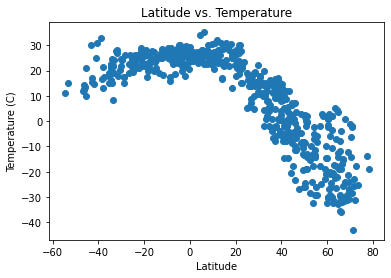

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(final_cities_df.iloc[:,2],final_cities_df.iloc[:,4])
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("Latitude vs. Temperature")
plt.show()

# Save as .png
plt.savefig('lat_temp.png')

## Latitude vs. Humidity Plot

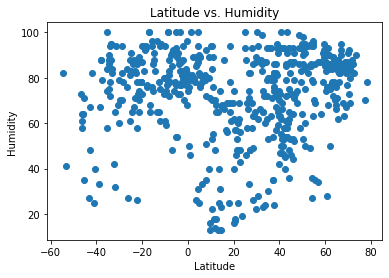

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(final_cities_df.iloc[:,2],final_cities_df.iloc[:,5])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.show()

# Save as .png
plt.savefig('lat_hum.png')

## Latitude vs. Cloudiness Plot

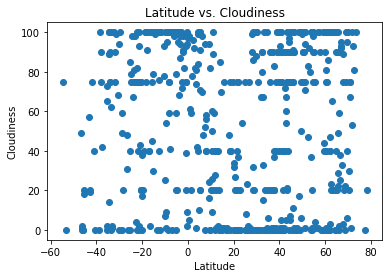

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(final_cities_df.iloc[:,2],final_cities_df.iloc[:,6])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.show()

# Save as .png
plt.savefig('lat_clouds.png')

## Latitude vs. Wind Speed Plot

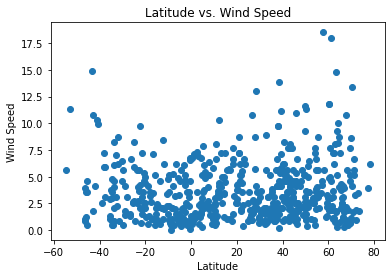

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(final_cities_df.iloc[:,2],final_cities_df.iloc[:,7])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.show()

# Save as .png
plt.savefig('lat_wind.png')

## Linear Regression

In [14]:
# Create northern hemisphere dataframe
northern_hem = final_cities_df[["city id", "city", "lat", "lng", "temp", "humidity", "cloudiness",
                                "wind speed"]].loc[(final_cities_df["lat"] >= 0)]

# Create southern hemisphere dataframe
southern_hem = final_cities_df[["city id", "city", "lat", "lng", "temp", "humidity", "cloudiness",
                                "wind speed"]].loc[(final_cities_df["lat"] <= 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

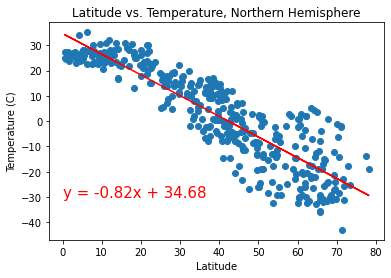

<Figure size 432x288 with 0 Axes>

In [27]:
# Create scatter plot
plt.scatter(northern_hem.iloc[:,2],northern_hem.iloc[:,4])
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("Latitude vs. Temperature, Northern Hemisphere")

# Calculate and apply linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem.iloc[:,2],northern_hem.iloc[:,4])
regress_values_north_temp = northern_hem.iloc[:,2] * slope + intercept
line_eq_north_temp = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hem.iloc[:,2],regress_values_north_temp,"r-")
plt.annotate(line_eq_north_temp,(0,-30),fontsize=15,color="red")

plt.show()

# Save as .png
plt.savefig('lat_north_temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

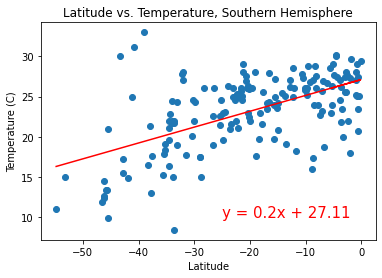

<Figure size 432x288 with 0 Axes>

In [25]:
# Create scatter plot
plt.scatter(southern_hem.iloc[:,2],southern_hem.iloc[:,4])
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("Latitude vs. Temperature, Southern Hemisphere")

# Calculate and apply linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem.iloc[:,2],southern_hem.iloc[:,4])
regress_values_south_temp = southern_hem.iloc[:,2] * slope + intercept
line_eq_south_temp = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hem.iloc[:,2],regress_values_south_temp,"r-")
plt.annotate(line_eq_south_temp,(-25,10),fontsize=15,color="red")

plt.show()

# Save as .png
plt.savefig('lat_south_temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

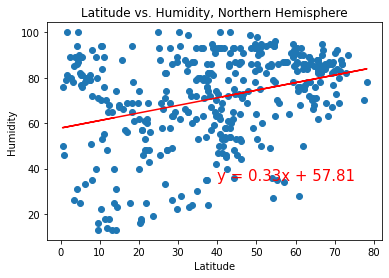

<Figure size 432x288 with 0 Axes>

In [21]:
# Create scatter plot
plt.scatter(northern_hem.iloc[:,2],northern_hem.iloc[:,5])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity, Northern Hemisphere")

# Calculate and apply linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem.iloc[:,2],northern_hem.iloc[:,5])
regress_values_north_hum = northern_hem.iloc[:,2] * slope + intercept
line_eq_north_hum = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hem.iloc[:,2],regress_values_north_hum,"r-")
plt.annotate(line_eq_north_hum,(40,35),fontsize=15,color="red")

plt.show()

# Save as .png
plt.savefig('lat_north_hum.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

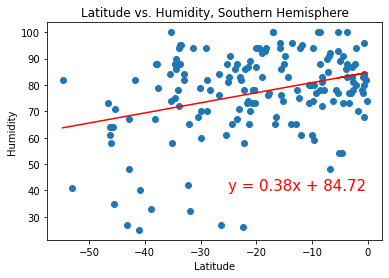

<Figure size 432x288 with 0 Axes>

In [30]:
# Create scatter plot
plt.scatter(southern_hem.iloc[:,2],southern_hem.iloc[:,5])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity, Southern Hemisphere")

# Calculate and apply linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem.iloc[:,2],southern_hem.iloc[:,5])
regress_values_south_hum = southern_hem.iloc[:,2] * slope + intercept
line_eq_south_hem = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hem.iloc[:,2],regress_values_south_hum,"r-")
plt.annotate(line_eq_south_hem,(-25,40),fontsize=15,color="red")

plt.show()

# Save as .png
plt.savefig('lat_south_hum.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

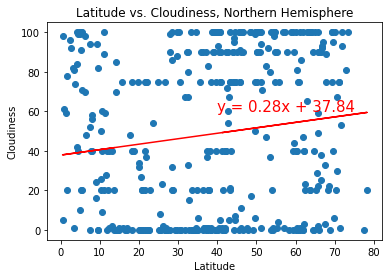

<Figure size 432x288 with 0 Axes>

In [31]:
# Create scatter plot
plt.scatter(northern_hem.iloc[:,2],northern_hem.iloc[:,6])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness, Northern Hemisphere")

# Calculate and apply linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem.iloc[:,2],northern_hem.iloc[:,6])
regress_values_north_cloud = northern_hem.iloc[:,2] * slope + intercept
line_eq_north_cloud = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hem.iloc[:,2],regress_values_north_cloud,"r-")
plt.annotate(line_eq_north_cloud,(40,60),fontsize=15,color="red")

plt.show()

# Save as .png
plt.savefig('lat_north_clouds.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

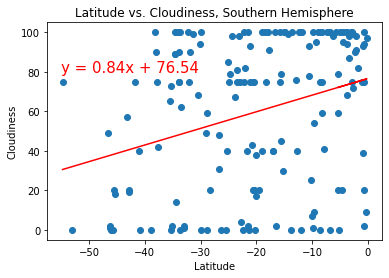

<Figure size 432x288 with 0 Axes>

In [34]:
# Create scatter plot
plt.scatter(southern_hem.iloc[:,2],southern_hem.iloc[:,6])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness, Southern Hemisphere")

# Calculate and apply linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem.iloc[:,2],southern_hem.iloc[:,6])
regress_values_south_cloud = southern_hem.iloc[:,2] * slope + intercept
line_eq_south_cloud = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hem.iloc[:,2],regress_values_south_cloud,"r-")
plt.annotate(line_eq_south_cloud,(-55,80),fontsize=15,color="red")

plt.show()

# Save as .png
plt.savefig('lat_south_clouds.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

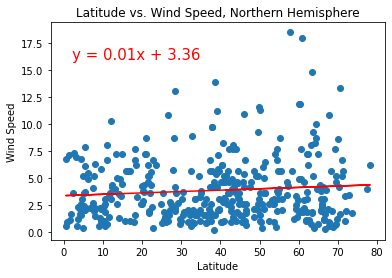

<Figure size 432x288 with 0 Axes>

In [36]:
# Create scatter plot
plt.scatter(northern_hem.iloc[:,2],northern_hem.iloc[:,7])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed, Northern Hemisphere")

# Calculate and apply linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hem.iloc[:,2],northern_hem.iloc[:,7])
regress_values_north_wind = northern_hem.iloc[:,2] * slope + intercept
line_eq_north_wind = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(northern_hem.iloc[:,2],regress_values_north_wind,"r-")
plt.annotate(line_eq_north_wind,(2,16),fontsize=15,color="red")

plt.show()

# Save as .png
plt.savefig('lat_north_wind.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

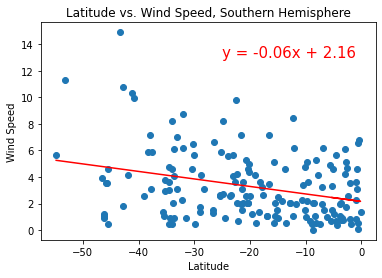

<Figure size 432x288 with 0 Axes>

In [37]:
# Create scatter plot
plt.scatter(southern_hem.iloc[:,2],southern_hem.iloc[:,7])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed, Southern Hemisphere")

# Calculate and apply linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hem.iloc[:,2],southern_hem.iloc[:,7])
regress_values_south_wind = southern_hem.iloc[:,2] * slope + intercept
line_eq_south_wind = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(southern_hem.iloc[:,2],regress_values_south_wind,"r-")
plt.annotate(line_eq_south_wind,(-25,13),fontsize=15,color="red")

plt.show()

# Save as .png
plt.savefig('lat_south_wind.png')